In [1]:
import optforge as of
import optuna
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

of.integrations.silence_optuna()

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

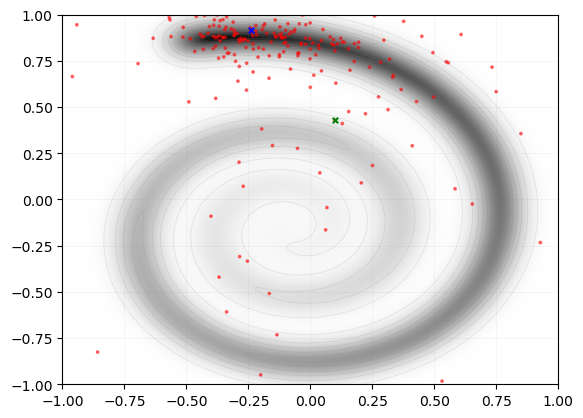

In [2]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: optuna.Trial):
    x = trial.suggest_float('x', -1, 1)
    y = trial.suggest_float('y', -1, 1)
    return vob.step_noline((x,y))

sampler = optuna.samplers.TPESampler(seed=0)
study = optuna.create_study(sampler = sampler)
study.optimize(objective, 200)

vob.plot()

evals: 200/200 | best value: 0.0269                            
Job finished in 2.9s., did 200 evaluations.


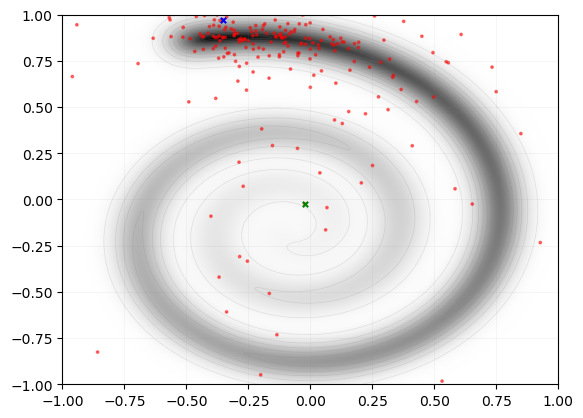

In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.OptunaSampler(
    optuna.samplers.TPESampler(seed=0),
)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 200,
    bounds = (-1, 1)
)
vob.plot()

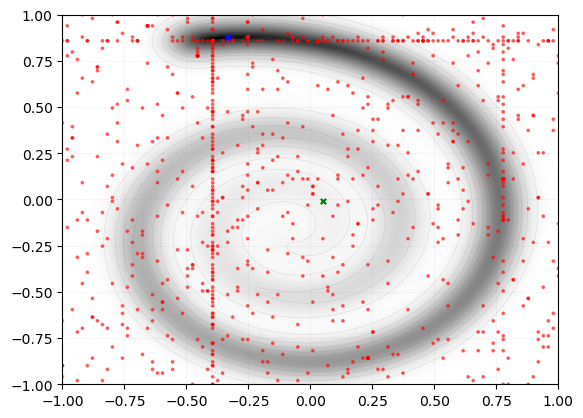

In [4]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: optuna.Trial):
    x = trial.suggest_categorical('x', np.linspace(-1, 1, 100).tolist())
    y = trial.suggest_categorical('y', np.linspace(-1, 1, 100).tolist())
    return vob.step_noline((x,y))

sampler = optuna.samplers.TPESampler(seed=0)
study = optuna.create_study(sampler = sampler)
study.optimize(objective, 1000)

vob.plot()

evals: 1000/1000 | best value: 0.1118                            
Job finished in 12.7s., did 1000 evaluations.


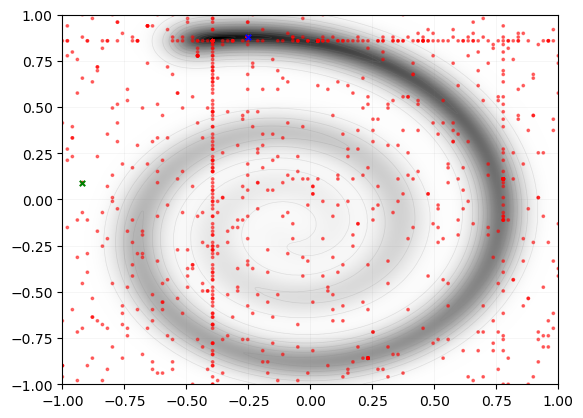

In [5]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=False)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.OptunaSampler(
    optuna.samplers.TPESampler(seed=0),
)
study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)
vob.plot()

evals: 200/200 | best value: 0.2883                            
Job finished in 314.1s., did 200 evaluations.


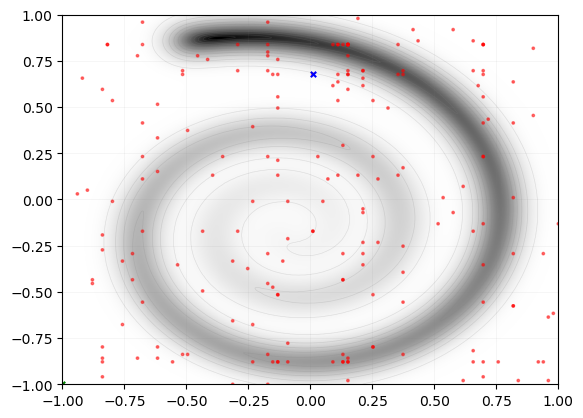

In [6]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=True)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.OptunaSampler(
    optuna.samplers.TPESampler(seed=0),
)
study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 200,
)
vob.plot()